### Importing drive and libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [ ]:
train_path="/content/drive/MyDrive/projects/Covid detection/Train"
validation_path="/content/drive/MyDrive/projects/Covid detection/Validation"

### Preprocessing data

#### Preprocessing the training set

In [ ]:
train_datagen= image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2,
)

train_set=train_datagen.flow_from_directory(train_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 248 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'covid': 0, 'normal': 1}

#### Preprocessing the validation set

In [ ]:
validation_datagen=image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2

)

validation_set=validation_datagen.flow_from_directory(validation_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 81 images belonging to 2 classes.


#### Visualization of covid and normal images

printing these three images
IM-0730-0001.jpeg
NORMAL2-IM-0905-0001.jpeg
NORMAL2-IM-0776-0001.jpeg


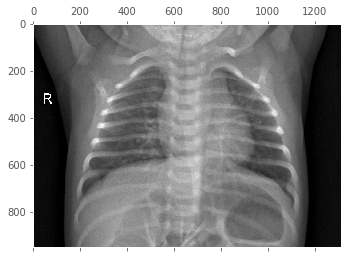

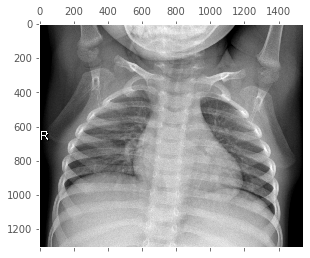

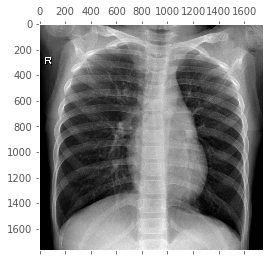

In [ ]:
import os,random
folder_n="/content/drive/MyDrive/projects/Covid detection/Train/normal"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]
for i in range(len(random_n)):
  file=folder_n + "/" + random_n[i]
  img=image.load_img(file)
  plt.matshow(img)
  plt.grid(False)
  plt.show()

printing these three images
1141cc2b8b9cc394becce5d978b5a7_jumbo.jpeg
covid-19-caso-95-1-15.png
1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg


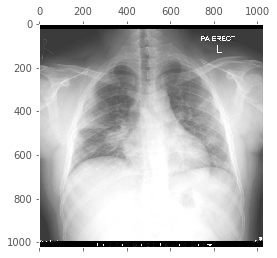

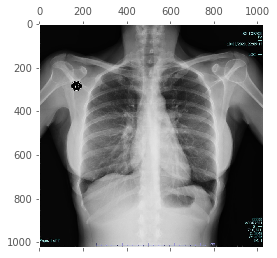

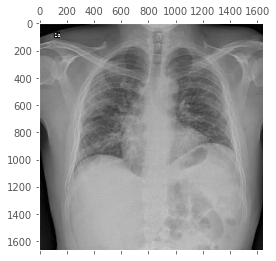

In [ ]:
folder_n="/content/drive/MyDrive/projects/Covid detection/Train/covid"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]

for i in range(len(random_n)):
  file=folder_n + "/" + random_n[i]
  img=image.load_img(file)
  plt.matshow(img)
  plt.grid(False)
  plt.show()

### 2.Building the CNN



#### Intialising the layer

In [ ]:
model=Sequential()

#### Add convolution layer

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

#### Flattening 

In [ ]:
model.add(tf.keras.layers.Flatten())

#### Full connection

In [ ]:
model.add(tf.keras.layers.Dense(units=64,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))

#### Output layer

In [ ]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

### 3.Training the CNN

##### Compiling the CNN

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

##### Training the CNN on training set

In [ ]:
history=model.fit(x=train_set,steps_per_epoch=8,epochs=25,
         validation_steps=2,validation_data=validation_set)

Epoch 1/25
8/8 [==============================] - 73s 5s/step - loss: 1.1630 - accuracy: 0.4833 - val_loss: 0.6552 - val_accuracy: 0.6562
Epoch 2/25
8/8 [==============================] - 22s 3s/step - loss: 0.6635 - accuracy: 0.5583 - val_loss: 0.6711 - val_accuracy: 0.6562
Epoch 3/25
8/8 [==============================] - 12s 2s/step - loss: 0.6286 - accuracy: 0.6667 - val_loss: 0.5914 - val_accuracy: 0.8125
Epoch 4/25
8/8 [==============================] - 11s 1s/step - loss: 0.4469 - accuracy: 0.7734 - val_loss: 0.2810 - val_accuracy: 0.9062
Epoch 5/25
8/8 [==============================] - 10s 1s/step - loss: 0.3497 - accuracy: 0.8047 - val_loss: 0.3807 - val_accuracy: 0.9375
Epoch 6/25
8/8 [==============================] - 8s 1s/step - loss: 0.4971 - accuracy: 0.7750 - val_loss: 0.3519 - val_accuracy: 0.9062
Epoch 7/25
8/8 [==============================] - 8s 1s/step - loss: 0.3531 - accuracy: 0.8667 - val_loss: 0.2586 - val_accuracy: 0.8750
Epoch 8/25
8/8 [====================

#### Visualization of loss and accuracy 

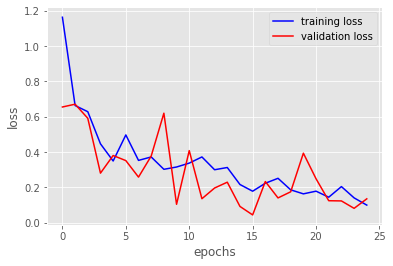

In [ ]:
plt.plot(history.history["loss"],"r",label="training loss",color="blue")
plt.plot(history.history["val_loss"],label="validation loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

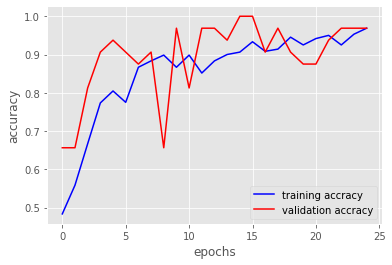

In [ ]:
plt.plot(history.history["accuracy"],"r",label="training accracy",color="blue")
plt.plot(history.history["val_accuracy"],label="validation accracy",color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

##### Making a single prediction

In [ ]:
image_path="/content/drive/MyDrive/projects/Covid detection/Test_data/covid/f8335316.jpg"
img=image.load_img(image_path,target_size=(256,256))
img=image.img_to_array(img)/255
img=np.array([img])
print(img.shape)
model.predict(img)

(1, 256, 256, 3)


array([[0.00011025]], dtype=float32)